Name: Tan Jun Sheng (TP064017)

Theme: Building A Novel Predictive Model To Predict Tourist Travel Preferences For Effective Planning Of Domestic Tour Package

In [ ]:
#Mounting our Drive to Google Colab
from google.colab import drive
drive.mount('/drive')

In [ ]:
# Import necessary libraries

import pandas as pd # data analysis
import numpy as np # arrays

# For Modelling - Clustering 
!pip install kmodes
from kmodes.kmodes import KModes # KModes is the model
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for visualisation

# Export the dataset to csv - as a backup copy after changes has been made
import openpyxl as xls 

from sklearn.compose import make_column_transformer # for one hot encoding & piping
from sklearn.pipeline import make_pipeline #pipe library was loaded to streamline the workflow 
from sklearn.preprocessing import OneHotEncoder # for one hot encoding

from sklearn.model_selection import train_test_split # for data partitioning 

# For Modelling - Classification 
from sklearn.linear_model import LogisticRegression # building the logistic regression model
from sklearn.tree import DecisionTreeClassifier # Decision Tree model
from sklearn.neural_network import MLPClassifier  # Neural Network - Multilayer Perceptron
from sklearn.ensemble import RandomForestClassifier # Random Forest

# For performance evaluation
from sklearn.metrics import classification_report, confusion_matrix # Compute Confusion Matrix 

# For deployment
import streamlit as st # import streamlit for web development
import pickle # for saving the model
! pip install pyngrok
from pyngrok import ngrok # creating the link to the web application

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 6.5 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=ee2785bad252301480e99f24754881edfeece268445d3ec0d5ae5bad98ddd70c
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
path = '/drive/MyDrive/Colab Notebooks/CLEAN_2_Tour Agencies_v2.csv'
data = pd.read_csv(path)

Step 1: Initial Data Exploration

In [ ]:
# View all variables in the dataset
data.columns

Index(['I have read and understood the above information. I understand that, because my answers will be fully anonymized, it will not be possible to withdraw them from the study once I have completed the survey. I agree to take part in this questionnaire survey a',
       'Are you currently residing in Malaysia?', 'gender', 'age',
       'household_income', 'marital_status', 'chidlren_no', 'education_level',
       'occupation', 'trip_plan_likelihood', 'travel_purpose',
       'source_travel_info', 'pref_socialmed_info', 'pref_transport_mode',
       'pref_length_stay', 'travel_pay_willingness', 'pref_poi',
       'pref_group_size', 'pref_travel_destination'],
      dtype='object')

In [ ]:
# Remove irrelavant columns 
# First 2 variables will not be useful for further analysis

data = data.drop(['I have read and understood the above information. I understand that, because my answers will be fully anonymized, it will not be possible to withdraw them from the study once I have completed the survey. I agree to take part in this questionnaire survey a', 
                  'Are you currently residing in Malaysia?'], axis=1)
data.columns 

Index(['gender', 'age', 'household_income', 'marital_status', 'chidlren_no',
       'education_level', 'occupation', 'trip_plan_likelihood',
       'travel_purpose', 'source_travel_info', 'pref_socialmed_info',
       'pref_transport_mode', 'pref_length_stay', 'travel_pay_willingness',
       'pref_poi', 'pref_group_size', 'pref_travel_destination'],
      dtype='object')

In [ ]:
# View dataset total observations and variables
data.shape

(115, 17)

In [ ]:
# Check the variable information (Data type etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   115 non-null    object
 1   age                      115 non-null    object
 2   household_income         115 non-null    object
 3   marital_status           115 non-null    object
 4   chidlren_no              115 non-null    object
 5   education_level          115 non-null    object
 6   occupation               115 non-null    object
 7   trip_plan_likelihood     115 non-null    int64 
 8   travel_purpose           115 non-null    object
 9   source_travel_info       115 non-null    object
 10  pref_socialmed_info      115 non-null    object
 11  pref_transport_mode      115 non-null    object
 12  pref_length_stay         115 non-null    object
 13  travel_pay_willingness   115 non-null    object
 14  pref_poi                 115 non-null    o

In [ ]:
# Simple view on the dataset 
data.head()

Step 2: Data Understanding / EDA was carried out in R Programming

Step 3: Data Pre-Processing (Phase 1)

Variable - AGE

In [ ]:
# Age 
# Issues: Imbalance as majority of the observations are under the 18-25 group
# Solution: Combine '26-34', '35-49', '50 and above' into a new '26 and above' group
data['age'].describe()
data['age'].value_counts()

18 - 25 years old    88
26 - 34 years old    23
35 - 49 years old     3
50 and above          1
Name: age, dtype: int64

In [ ]:
# combine the other 2 variables
data['age'] = data['age'].replace({'35 - 49 years old': '26 - 34 years old'})
data['age'] = data['age'].replace({'50 and above': '26 - 34 years old'})
data['age'].value_counts()

18 - 25 years old    88
26 - 34 years old    27
Name: age, dtype: int64

In [ ]:
# rename the category level to a much more appropriate name
data['age'] = data['age'].replace({'26 - 34 years old': '26 years and above'})
data['age'].value_counts()

18 - 25 years old     88
26 years and above    27
Name: age, dtype: int64

Variable - MONTHLY HOUSEHOLD INCOME

In [ ]:
# Monthly Household Income
data['household_income'].value_counts()

Less than RM 4,850             57
Between RM 4,851 - RM10,959    40
More than 10,959               18
Name: household_income, dtype: int64

In [ ]:
# As this dataset has not much observations, it is crucial to reduce the factor levels to improve model performance
# Option 1 -> combine More than 10,959 with Between RM 4,851 - RM 10,959
# Rename the new categorical level as 'More than 4,851'
data['household_income'] = data['household_income'].replace({'Between RM 4,851 - RM10,959': 'More than RM 4,851'})
data['household_income'] = data['household_income'].replace({'More than 10,959': 'More than RM 4,851'})
data['household_income'].value_counts()

More than RM 4,851    58
Less than RM 4,850    57
Name: household_income, dtype: int64

Variable - MARITAL STATUS

In [ ]:
#drop variables - data for this variable is hugely imbalance
data = data.drop(['marital_status'], axis = 1) 
# axis=0 refers to deletion of rows and axis=1 refers to deletion of columns

Variable - NUMBER OF CHILDREN

In [ ]:
#drop variables - data for this variable is hugely imbalance
data = data.drop(['chidlren_no'], axis = 1) 

Variable - EDUCATION LEVEL

In [ ]:
# Education Level
# combine the other 2 categories (High School & Foundation / Diploma into one)
data['education_level'].value_counts()

Undergraduate / Bachelor's Degree    79
Master's Degree                      25
High School                           7
Foundation / Diploma                  4
Name: education_level, dtype: int64

In [ ]:
data['education_level'] = data['education_level'].replace({'High School': 'Foundation / Diploma / High School'})
data['education_level'] = data['education_level'].replace({'Foundation / Diploma': 'Foundation / Diploma / High School'})
data['education_level'].value_counts()

Undergraduate / Bachelor's Degree     79
Master's Degree                       25
Foundation / Diploma / High School    11
Name: education_level, dtype: int64

Variable - OCCUPATION

In [ ]:
# Occupation
# combine the other 1 category (Self-Employed) into (Employed) 
data['occupation'].value_counts()

Student          69
Employed         45
Self-Employed     1
Name: occupation, dtype: int64

In [ ]:
# combine the other 1 category (Self-Employed) into (Employed) 
data['occupation'] = data['occupation'].replace({'Self-Employed': 'Employed'})
data['occupation'].value_counts()

Student     69
Employed    46
Name: occupation, dtype: int64

Variable - TRIP_PLAN_LIKELIHOOD

In [ ]:
# trip_plan_likelihood
# can be removed as this variable is just to help us visualise the
# likelihood of travellers planning to travel in the next 12 months
#drop variables 
data = data.drop(['trip_plan_likelihood'], axis = 1)

Variable - TRAVEL PURPOSE

In [ ]:
# travel_purpose
# combine the other 1 category (Self-Employed) into (Employed) 
data['travel_purpose'].value_counts()

Holiday & Leisure          79
Family Trip                23
Entertainment               9
Shopping                    2
Corporate team building     1
Fly car                     1
Name: travel_purpose, dtype: int64

In [ ]:
# Issue: Imbalance data on a few categorical factor levels
# combine 'Family trip', 'entertainment', 'shopping', 'corporate team building' and 'fly car' into one category level
# new category level name -> 'Family Trip / Entertainment / Others'
data['travel_purpose'] = data['travel_purpose'].replace({'Family Trip': 'Family Trip / Entertainment / Others'})
data['travel_purpose'] = data['travel_purpose'].replace({'Entertainment': 'Family Trip / Entertainment / Others'})
data['travel_purpose'] = data['travel_purpose'].replace({'Shopping': 'Family Trip / Entertainment / Others'})
data['travel_purpose'] = data['travel_purpose'].replace({'Corporate team building': 'Family Trip / Entertainment / Others'})
data['travel_purpose'] = data['travel_purpose'].replace({'Fly car': 'Family Trip / Entertainment / Others'})
data['travel_purpose'].value_counts()

Holiday & Leisure                       79
Family Trip / Entertainment / Others    36
Name: travel_purpose, dtype: int64

Variable - SOURCE TRAVEL INFO

In [ ]:
# source_travel_info
# can be removed as this variable is just to help us visualise the
# source of travellers collecting travel related information and not directly related to group package
#drop variables 
data = data.drop(['source_travel_info'], axis = 1) 

Variable - PREFERRED SOCIAL MEDIA INFO

In [ ]:
# Option 1 - Remove as this variable does not directly related to group package
data = data.drop(['pref_socialmed_info'], axis = 1) 

Variable - PREFERRED MODE OF TRANSPORT

In [ ]:
#pref_transport_mode 
data['pref_transport_mode'].value_counts()

Flight    78
Bus       23
Train     14
Name: pref_transport_mode, dtype: int64

In [ ]:
# Combine 'Bus' and 'Train' and form a new level to be referred as 'Non-Flight'
data['pref_transport_mode'] = data['pref_transport_mode'].replace({'Bus': 'Non_Flight'})
data['pref_transport_mode'] = data['pref_transport_mode'].replace({'Train': 'Non_Flight'})
data['pref_transport_mode'].value_counts()

Flight        78
Non_Flight    37
Name: pref_transport_mode, dtype: int64

Variable - PREFERRED LENGTH OF STAY

In [ ]:
# pref_length_stay 
data['pref_length_stay'].value_counts()

3 Days              47
Less than 3 days    25
5 Days              22
4 Days              21
Name: pref_length_stay, dtype: int64

In [ ]:
# Combine '5 days' and '4 days' together and form a new level to be renamed as '4 days and above'
data['pref_length_stay'] = data['pref_length_stay'].replace({'5 Days': '4 days and above'})
data['pref_length_stay'] = data['pref_length_stay'].replace({'4 Days': '4 days and above'})
data['pref_length_stay'].value_counts()

3 Days              47
4 days and above    43
Less than 3 days    25
Name: pref_length_stay, dtype: int64

Variable - WILLINGNESS TO PAY

In [ ]:
# travel_pay_willingness
data['travel_pay_willingness'].value_counts()

Between RM 200 – 300    61
More than RM 300        42
Less than RM 200        12
Name: travel_pay_willingness, dtype: int64

In [ ]:
# Issue: 'Less than RM 200' has not much observations
# Solution no. 1 ->  Combine the level with the 'Between Rm 200 - 300'
# Rename the new level as 'Less than RM 300'
data['travel_pay_willingness'] = data['travel_pay_willingness'].replace({'Between RM 200 – 300': 'Less than RM 300'})
data['travel_pay_willingness'] = data['travel_pay_willingness'].replace({'Less than RM 200': 'Less than RM 300'})
data['travel_pay_willingness'].value_counts()

Less than RM 300    73
More than RM 300    42
Name: travel_pay_willingness, dtype: int64

Variable - PREFERRED POI

In [ ]:
# pref_poi
data['pref_poi'].value_counts()

Beaches and waterfall                                          46
Adventure and Activity (Ex: Hiking, Mountain Climbing etc.)    39
Cultural or Historical Site                                    24
Shopping Malls                                                  6
Name: pref_poi, dtype: int64

In [ ]:
# Imbalance in 'shopping malls' level - May cause issues in training the ML model
# Combine 'shopping malls' and 'Cultural or historical site' to form a new categorical level
data['pref_poi'] = data['pref_poi'].replace({'Cultural or Historical Site': 'Shopping Malls & Historical Site'})
data['pref_poi'] = data['pref_poi'].replace({'Shopping Malls': 'Shopping Malls & Historical Site'})
data['pref_poi'].value_counts()

Beaches and waterfall                                          46
Adventure and Activity (Ex: Hiking, Mountain Climbing etc.)    39
Shopping Malls & Historical Site                               30
Name: pref_poi, dtype: int64

Variable - PREFERRED TRAVEL GROUP SIZE

In [ ]:
# pref_group_size
data['pref_group_size'].value_counts()

Family Travel (3 – 6 people)         82
Small Group (6 – 10 people)          32
Large Group (More than 10 people)     1
Name: pref_group_size, dtype: int64

In [ ]:
# combine 'Large Group' with 'Small Group' as it only has 1 observation
# rename the new categorical variable after combination
data['pref_group_size'] = data['pref_group_size'].replace({'Large Group (More than 10 people)': 'Small & Large Group (6 people and above)'})
data['pref_group_size'] = data['pref_group_size'].replace({'Small Group (6 – 10 people)': 'Small & Large Group (6 people and above)'})
data['pref_group_size'].value_counts()

Family Travel (3 – 6 people)                82
Small & Large Group (6 people and above)    33
Name: pref_group_size, dtype: int64

Step 4: Model Building (Phase 1) - Clustering

In [ ]:
# Import libraries 
# Clustering
import pandas as pd
import numpy as np
# !pip install kmodes
!pip install kmodes
from kmodes.kmodes import KModes

import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 565.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 565.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 565.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 565.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 565.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21, cost: 484.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 18, cost: 491.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, 

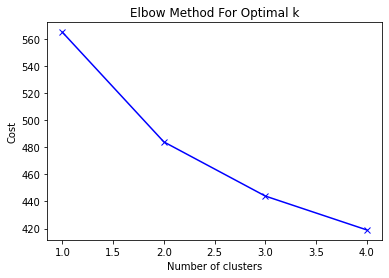

In [ ]:
# KMODES CLUSTERING ALGORITHM
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for no_of_clusters in list(K):
    kmode = KModes(n_clusters=no_of_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters') 
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show() # to show us how the algorithm came into this conclusion that "3" is the optimal k

In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
data_clusters = kmode.fit_predict(data)
data_clusters

In [ ]:
data.insert(0, "Cluster", data_clusters, True)
data

,Cluster,gender,age,household_income,education_level,occupation,travel_purpose,pref_transport_mode,pref_length_stay,travel_pay_willingness,pref_poi,pref_group_size,pref_travel_destination
0,0,Female,18 - 25 years old,"More than RM 4,851",Master's Degree,Student,Family Trip / Entertainment / Others,Flight,Less than 3 days,Less than RM 300,Shopping Malls & Historical Site,Family Travel (3 – 6 people),East Malaysia (Sabah and Sarawak)
1,1,Male,18 - 25 years old,"More than RM 4,851",Undergraduate / Bachelor's Degree,Employed,Holiday & Leisure,Flight,3 Days,Less than RM 300,Shopping Malls & Historical Site,Family Travel (3 – 6 people),"Southern Region (Malacca, Johor and Negeri Sem..."
2,2,Female,18 - 25 years old,"Less than RM 4,850",Undergraduate / Bachelor's Degree,Employed,Holiday & Leisure,Flight,3 Days,More than RM 300,Beaches and waterfall,Small & Large Group (6 people and above),"East Coast Region (Kelantan, Terengganu and Pa..."
3,2,Male,18 - 25 years old,"Less than RM 4,850",Master's Degree,Employed,Holiday & Leisure,Non_Flight,Less than 3 days,Less than RM 300,Beaches and waterfall,Family Travel (3 – 6 people),"East Coast Region (Kelantan, Terengganu and Pa..."
4,2,Female,18 - 25 years old,"Less than RM 4,850",Master's Degree,Employed,Holiday & Leisure,Flight,3 Days,More than RM 300,"Adventure and Activity (Ex: Hiking, Mountain C...",Family Travel (3 – 6 people),"East Coast Region (Kelantan, Terengganu and Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1,Male,18 - 25 years old,"More than RM 4,851",Undergraduate / Bachelor's Degree,Employed,Holiday & Leisure,Flight,4 days and above,Less than RM 300,Shopping Malls & Historical Site,Small & Large Group (6 people and above),"Northern Region (Perlis, Kedah, Penang and Perak)"
111,0,Female,18 - 25 years old,"More than RM 4,851",Undergraduate / Bachelor's Degree,Student,Holiday & Leisure,Non_Flight,4 days and above,Less than RM 300,"Adventure and Activity (Ex: Hiking, Mountain C...",Family Travel (3 – 6 people),"Southern Region (Malacca, Johor and Negeri Sem..."
112,0,Female,26 years and above,"Less than RM 4,850",Undergraduate / Bachelor's Degree,Student,Family Trip / Entertainment / Others,Flight,4 days and above,More than RM 300,"Adventure and Activity (Ex: Hiking, Mountain C...",Small & Large Group (6 people and above),Central Region (Kuala Lumpur and Selangor)
113,2,Female,18 - 25 years old,"Less than RM 4,850",Undergraduate / Bachelor's Degree,Employed,Holiday & Leisure,Flight,Less than 3 days,Less than RM 300,Beaches and waterfall,Family Travel (3 – 6 people),East Malaysia (Sabah and Sarawak)


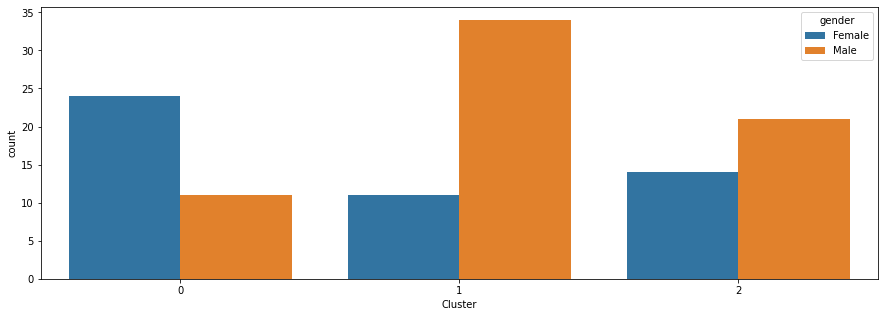

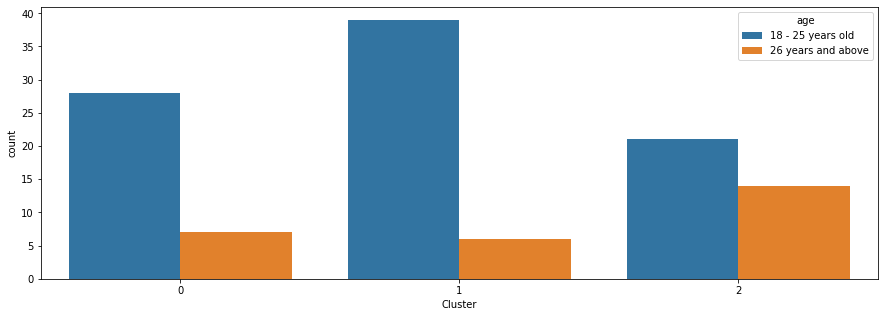

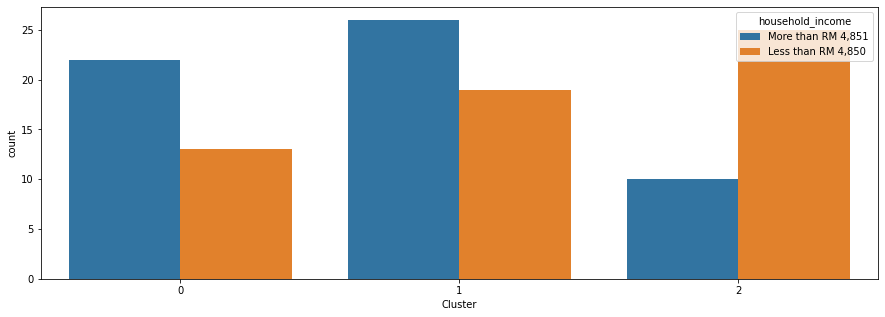

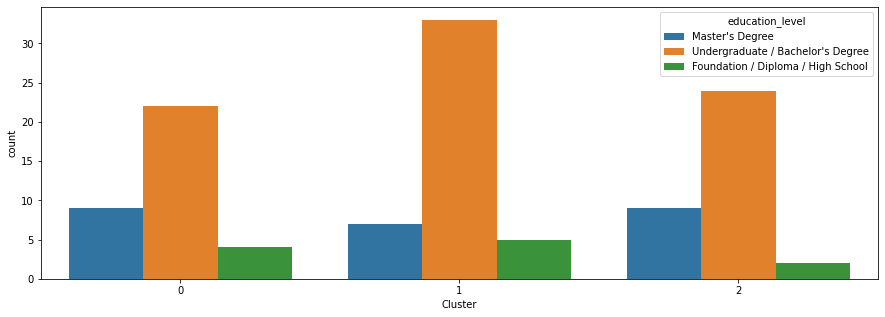

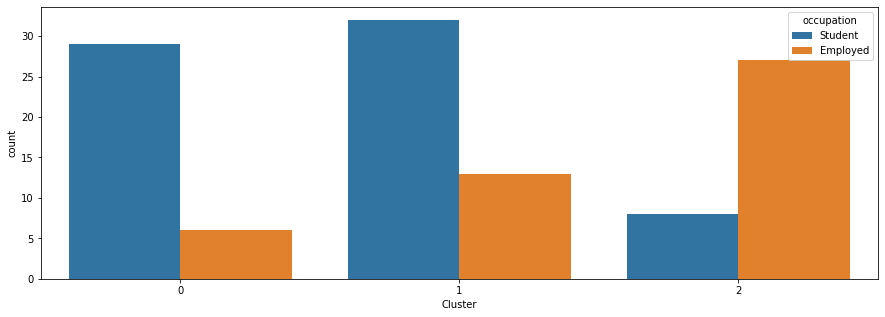

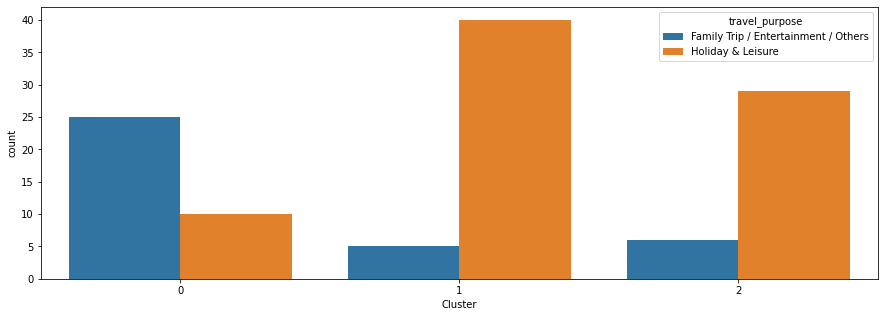

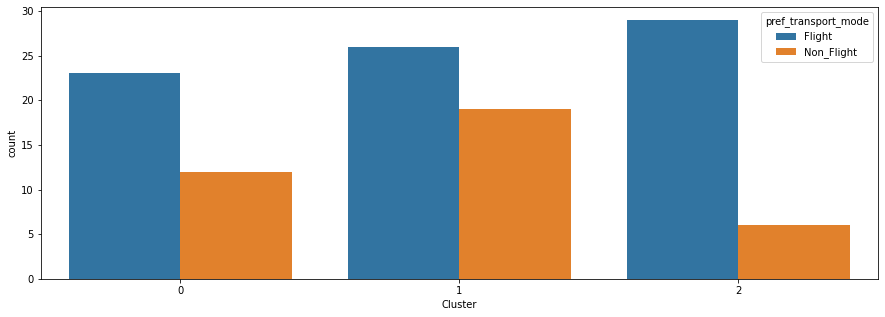

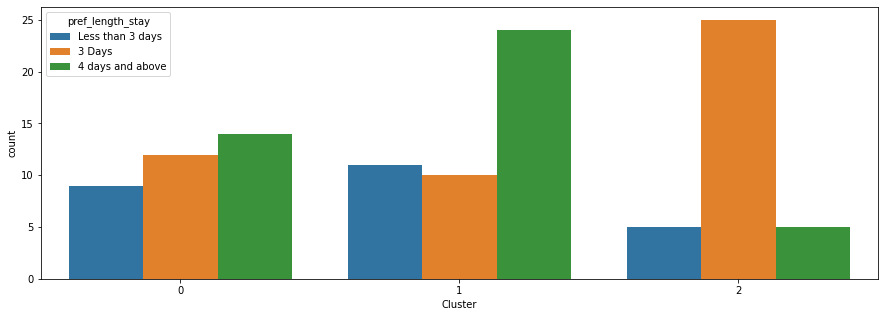

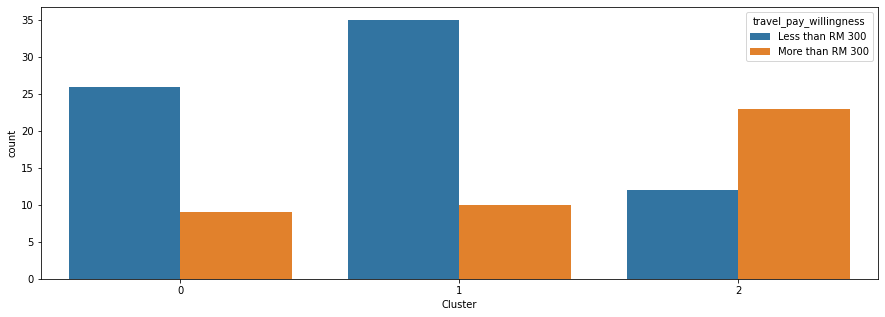

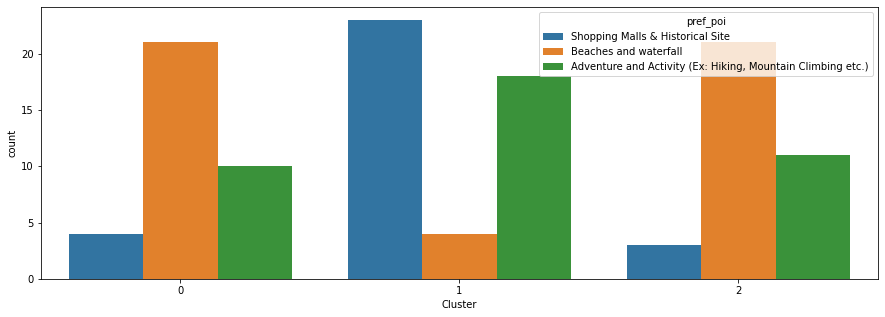

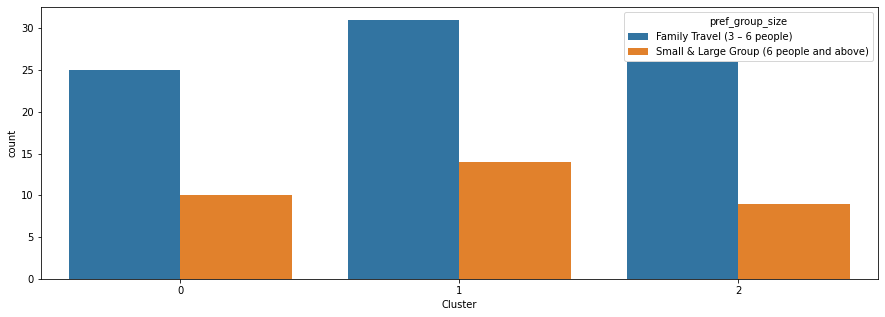

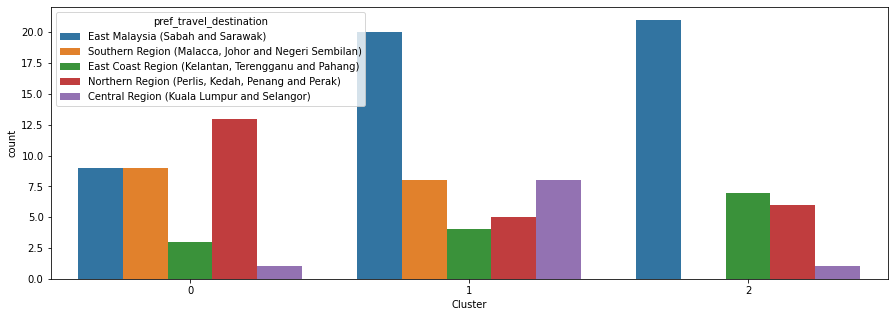

In [ ]:
import seaborn as sns
all_features = ['gender', 'age', 'household_income',
       'education_level', 'occupation', 'travel_purpose',
       'pref_transport_mode', 'pref_length_stay', 'travel_pay_willingness',
       'pref_poi', 'pref_group_size', 'pref_travel_destination']
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = data)
    plt.show()

In [ ]:
# the variable 'cluster' type is classified as 'numeric' - hence, changes needed to change
# creating a dictionary 
# with column name and data type
data_types_dict = {'Cluster': str}
  
# we will change the data type 
# of id column to str by giving
# the dict to the astype method
data = data.astype(data_types_dict)
  
# checking the data types
# using df.dtypes method
data.dtypes

Cluster                    object
gender                     object
age                        object
household_income           object
education_level            object
occupation                 object
travel_purpose             object
pref_transport_mode        object
pref_length_stay           object
travel_pay_willingness     object
pref_poi                   object
pref_group_size            object
pref_travel_destination    object
dtype: object

In [ ]:
# Export the dataset to csv - backup copy
import pandas as pd
import openpyxl as xls

data.to_csv("data_tour_cluster.csv")

Step 5: Data Pre-Processing (Phase 2)

In [ ]:
path = '/drive/MyDrive/Colab Notebooks/data_tour_cluster.csv' # load new dataset (with "cluster" as the target variable)
data = pd.read_csv(path)

In [ ]:
# Check the variable information (Data type etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               115 non-null    int64 
 1   Cluster                  115 non-null    int64 
 2   gender                   115 non-null    object
 3   age                      115 non-null    object
 4   household_income         115 non-null    object
 5   education_level          115 non-null    object
 6   occupation               115 non-null    object
 7   travel_purpose           115 non-null    object
 8   pref_transport_mode      115 non-null    object
 9   pref_length_stay         115 non-null    object
 10  travel_pay_willingness   115 non-null    object
 11  pref_poi                 115 non-null    object
 12  pref_group_size          115 non-null    object
 13  pref_travel_destination  115 non-null    object
dtypes: int64(2), object(12)
memory usage: 12.7

In [ ]:
# the variable 'cluster' type is classified as 'numeric' - hence, changes needed to change
# creating a dictionary 
# with column name and data type
data_types_dict = {'Cluster': str}
  
# we will change the data type 
# of id column to str by giving
# the dict to the astype method
data = data.astype(data_types_dict)
  
# checking the data types
# using df.dtypes method
data.dtypes

Unnamed: 0                  int64
Cluster                    object
gender                     object
age                        object
household_income           object
education_level            object
occupation                 object
travel_purpose             object
pref_transport_mode        object
pref_length_stay           object
travel_pay_willingness     object
pref_poi                   object
pref_group_size            object
pref_travel_destination    object
dtype: object

In [ ]:
# Remove irrelavant columns 
# First 2 variables will not be useful for further analysis

data = data.drop(['Unnamed: 0'], axis=1)
data.dtypes

Cluster                    object
gender                     object
age                        object
household_income           object
education_level            object
occupation                 object
travel_purpose             object
pref_transport_mode        object
pref_length_stay           object
travel_pay_willingness     object
pref_poi                   object
pref_group_size            object
pref_travel_destination    object
dtype: object

Label Encoding

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
# Label encode categorical variables
# gender # age # household income # education level # occupation

data_encoded = data.copy() # To serve as backup incase there is Pandas error
data_encoded[['gender', 'age', 'household_income','education_level', 'occupation', 'pref_transport_mode', 'travel_pay_willingness', 'pref_group_size', 'travel_purpose']] = data_encoded[['gender', 'age', 'household_income','education_level', 'occupation', 'pref_transport_mode', 'travel_pay_willingness', 'pref_group_size','travel_purpose']].apply(LabelEncoder().fit_transform)


In [ ]:
# Simple view on the dataset 
data_encoded.head()

,Cluster,gender,age,household_income,education_level,occupation,travel_purpose,pref_transport_mode,pref_length_stay,travel_pay_willingness,pref_poi,pref_group_size,pref_travel_destination
0,0,0,0,1,1,1,0,0,Less than 3 days,0,Shopping Malls & Historical Site,0,East Malaysia (Sabah and Sarawak)
1,1,1,0,1,2,0,1,0,3 Days,0,Shopping Malls & Historical Site,0,"Southern Region (Malacca, Johor and Negeri Sem..."
2,2,0,0,0,2,0,1,0,3 Days,1,Beaches and waterfall,1,"East Coast Region (Kelantan, Terengganu and Pa..."
3,2,1,0,0,1,0,1,1,Less than 3 days,0,Beaches and waterfall,0,"East Coast Region (Kelantan, Terengganu and Pa..."
4,2,0,0,0,1,0,1,0,3 Days,1,"Adventure and Activity (Ex: Hiking, Mountain C...",0,"East Coast Region (Kelantan, Terengganu and Pa..."


In [ ]:
# Feature Selection -> Based on Boruta in RStudio
# drop pref group size and education level
data_encoded = data_encoded.drop(['pref_group_size', 'education_level'], axis=1)

One Hot Encoding

In [ ]:
# One Hot Encoding
# pref length stay
# pref travel destination
# poi
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_transform_ohe = make_column_transformer(
               (OneHotEncoder(), ['pref_length_stay','pref_poi','pref_travel_destination']), 
               remainder = 'passthrough')

data_encoded_2 = column_transform_ohe.fit_transform(data_encoded)

In [ ]:
data_encoded_2

array([[0.0, 0.0, 1.0, ..., 0, 0, 0],
       [1.0, 0.0, 0.0, ..., 1, 0, 0],
       [1.0, 0.0, 0.0, ..., 1, 0, 1],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 0, 1],
       [0.0, 0.0, 1.0, ..., 1, 0, 0],
       [0.0, 1.0, 0.0, ..., 0, 0, 0]], dtype=object)

Step 6: Modelling - Supervised Machine Learning / Classification (Phase 2)

Data Partitioning / Data Splitting 

In [ ]:
# Identify target variable 
Y = data_encoded["Cluster"]
X = data_encoded.drop("Cluster", axis = 1)

In [ ]:
# Data Partitioning 
# Split the data
# 70% train & 30% test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  

(80, 10) (35, 10) (80,) (35,)


LOGISTIC REGRESSION - Multinomial (Multi-class)

In [ ]:
# Build Logistic Regression classifier 
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs') 
# 'multinomial' is selected as there are 3 categories in the target variable

In [ ]:
from sklearn.pipeline import make_pipeline
# pipe library was loaded to streamline the workflow 
# The code below will execute the one hot encoding process before training
# pipeline creation
# 1. Data Pre-processing -> One hot encode 
# 2. Apply LR classifier 

lrpipe = make_pipeline(column_transform_ohe, lrmodel)

In [ ]:
lrpipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['pref_length_stay',
                                                   'pref_poi',
                                                   'pref_travel_destination'])])),
                ('logisticregression',
                 LogisticRegression(multi_class='multinomial'))])

In [ ]:
y_pred = lrpipe.predict(X_test)
y_pred

array(['1', '2', '2', '1', '1', '1', '0', '2', '0', '2', '0', '2', '1',
       '2', '2', '0', '1', '1', '0', '1', '0', '0', '2', '2', '0', '0',
       '1', '1', '1', '0', '1', '0', '2', '1', '0'], dtype=object)

In [ ]:
# Model performance - LR (Accuracy)
accuracy = lrpipe.score(X_test, y_test)
print("Accuracy: %.4f" % accuracy)

Accuracy: 0.8857


In [ ]:
# Compute Confusion Matrix (Prediction of LR model)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  1]
 [ 0 12  0]
 [ 2  1  9]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.92      1.00      0.96        12
           2       0.90      0.75      0.82        12

    accuracy                           0.89        35
   macro avg       0.89      0.89      0.88        35
weighted avg       0.89      0.89      0.88        35



DECISION TREE (DT)

In [ ]:
# Build Decision tree classifier 
from sklearn.tree import DecisionTreeClassifier 
# DT classifier invovled as this project is a classification task
dtmodel = DecisionTreeClassifier(random_state = 42)

In [ ]:
from sklearn.pipeline import make_pipeline
# pipe library was loaded to streamline the workflow 
# The code below will execute the one hot encoding process before training
# pipeline creation
# 1. Data Pre-processing -> One hot encode 
# 2. Apply DT classifier 

dtpipe = make_pipeline(column_transform_ohe, dtmodel)

In [ ]:
dtpipe.fit(X_train, y_train) #train the DT model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['pref_length_stay',
                                                   'pref_poi',
                                                   'pref_travel_destination'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
y_pred = dtpipe.predict(X_test)
y_pred

array(['1', '2', '1', '1', '1', '1', '0', '2', '0', '1', '0', '2', '1',
       '2', '0', '1', '1', '1', '1', '1', '0', '2', '2', '2', '2', '1',
       '1', '0', '1', '0', '1', '2', '1', '1', '2'], dtype=object)

In [ ]:
# Model performance - DT (Accuracy)
accuracy = dtpipe.score(X_test, y_test)
print("Accuracy: %.4f" % accuracy)

Accuracy: 0.5429


In [ ]:
# Compute Confusion Matrix (Prediction of DT model)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3  3  5]
 [ 1 11  0]
 [ 3  4  5]]
              precision    recall  f1-score   support

           0       0.43      0.27      0.33        11
           1       0.61      0.92      0.73        12
           2       0.50      0.42      0.45        12

    accuracy                           0.54        35
   macro avg       0.51      0.54      0.51        35
weighted avg       0.52      0.54      0.51        35



ARTIFICIAL NEURAL NETWORK (ANN)

In [ ]:
from sklearn.neural_network import MLPClassifier 
# 2 Hidden layers
# Each Hidden layers has 100 neurons
nnmodel = MLPClassifier(hidden_layer_sizes = [100,100], alpha = 5.0, random_state = 42, solver = 'lbfgs')

In [ ]:
from sklearn.pipeline import make_pipeline
# pipe library was loaded to streamline the workflow 
# The code below will execute the one hot encoding process before training
# pipeline creation
# 1. Data Pre-processing -> One hot encode 
# 2. Apply Neural Network (ANN) 

nnpipe = make_pipeline(column_transform_ohe, nnmodel)

In [ ]:
nnpipe.fit(X_train, y_train) #train the ANN

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['pref_length_stay',
                                                   'pref_poi',
                                                   'pref_travel_destination'])])),
                ('mlpclassifier',
                 MLPClassifier(alpha=5.0, hidden_layer_sizes=[100, 100],
                               random_state=42, solver='lbfgs'))])

In [ ]:
y_pred = nnpipe.predict(X_test)
y_pred # view predicted results

array(['1', '2', '2', '1', '1', '1', '0', '2', '0', '2', '2', '2', '1',
       '2', '2', '0', '1', '1', '0', '1', '0', '0', '2', '2', '0', '0',
       '1', '1', '1', '0', '1', '0', '2', '1', '0'], dtype='<U1')

In [ ]:
# Model performance - ANN (Accuracy)
accuracy = nnpipe.score(X_test, y_test)
print("Accuracy: %.4f" % accuracy)

Accuracy: 0.9143


In [ ]:
# Compute Confusion Matrix (Prediction of ANN model)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  1]
 [ 0 12  0]
 [ 1  1 10]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      1.00      0.96        12
           2       0.91      0.83      0.87        12

    accuracy                           0.91        35
   macro avg       0.91      0.91      0.91        35
weighted avg       0.91      0.91      0.91        35



ENSEMBLE MODEL - RANDOM FOREST (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=20, random_state=42)

In [ ]:
from sklearn.pipeline import make_pipeline
# pipe library was loaded to streamline the workflow 
# The code below will execute the one hot encoding process before training
# pipeline creation
# 1. Data Pre-processing -> One hot encode 
# 2. Apply Random Forest (RF)

rfpipe = make_pipeline(column_transform_ohe, rfmodel)

In [ ]:
rfpipe.fit(X_train, y_train) #train the RF

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['pref_length_stay',
                                                   'pref_poi',
                                                   'pref_travel_destination'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=20, random_state=42))])

In [ ]:
y_pred = rfpipe.predict(X_test)
y_pred # view predicted results

array(['1', '2', '1', '1', '2', '1', '0', '0', '0', '2', '0', '1', '1',
       '2', '2', '1', '1', '1', '0', '1', '0', '0', '2', '0', '0', '1',
       '1', '1', '1', '0', '1', '0', '1', '1', '0'], dtype=object)

In [ ]:
# Model performance - RF (Accuracy)
accuracy = rfpipe.score(X_test, y_test)
print("Accuracy: %.4f" % accuracy)

Accuracy: 0.7143


In [ ]:
# Compute Confusion Matrix (Prediction of RF model)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 9  2  0]
 [ 0 11  1]
 [ 3  4  5]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.65      0.92      0.76        12
           2       0.83      0.42      0.56        12

    accuracy                           0.71        35
   macro avg       0.74      0.72      0.70        35
weighted avg       0.74      0.71      0.70        35



CROSS VALIDATION (JUST FOR EXPERIMENTATION PURPOSES)

Model Involved: ANN & LR

In [ ]:
# MODEL BUILDING (Separate X and Y)
Y = data_encoded["Cluster"]
X = data_encoded.drop("Cluster", axis = 1)

In [ ]:
# Split the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.50, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  

(57, 10) (58, 10) (57,) (58,)


In [ ]:
# ANN / MLP
from sklearn.neural_network import MLPClassifier 
model = MLPClassifier(hidden_layer_sizes = [100,100], alpha = 5.0, random_state = 42, solver = 'lbfgs')

In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(column_transform_ohe, model)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
cross_val_score(pipe, X_train, y_train, cv=5, scoring = 'accuracy').mean()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.790909090909091

In [ ]:
cross_val_score(pipe, X_test, y_test, cv=5, scoring = 'accuracy').mean()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8106060606060606

In [ ]:
# Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
from sklearn.pipeline import make_pipeline
pipe3 = make_pipeline(column_transform_ohe, model3)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
cross_val_score(pipe3, X_train, y_train, cv=5, scoring = 'accuracy').mean()

0.843939393939394

In [ ]:
cross_val_score(pipe3, X_test, y_test, cv=5, scoring = 'accuracy').mean()

0.8454545454545455

Step 7: Model Deployment

In [ ]:
# all libraries invovled
import streamlit as st # import streamlit for web development
import pickle
import numpy as np
import pandas as pd
from pyngrok import ngrok

In [ ]:
!pip install -q streamlit #restart runtime needed if unable to install

     |████████████████████████████████| 9.1 MB 6.7 MB/s 
     |████████████████████████████████| 235 kB 58.1 MB/s 
     |████████████████████████████████| 78 kB 7.3 MB/s 
     |████████████████████████████████| 164 kB 61.6 MB/s 
     |████████████████████████████████| 4.3 MB 46.4 MB/s 
     |████████████████████████████████| 181 kB 49.9 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 1.6 MB 41.7 MB/s 
     |████████████████████████████████| 51 kB 5.2 MB/s 


In [ ]:
import streamlit as st # import streamlit for web development

2022-07-05 05:12:46.149 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


In [ ]:
#import data set
path = '/drive/MyDrive/Colab Notebooks/data_tour_cluster.csv'
data = pd.read_csv(path)

In [ ]:
# the variable 'cluster' type is classified as 'numeric' - hence, changes needed to change
data_types_dict = {'Cluster': str} 
# change the data type 
data = data.astype(data_types_dict)

In [ ]:
# Remove irrelavant columns 
data = data.drop(['Unnamed: 0'], axis=1)
data.dtypes

Cluster                    object
gender                     object
age                        object
household_income           object
education_level            object
occupation                 object
travel_purpose             object
pref_transport_mode        object
pref_length_stay           object
travel_pay_willingness     object
pref_poi                   object
pref_group_size            object
pref_travel_destination    object
dtype: object

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
# Label encode categorical variables
# gender # age # household income # education level # occupation

data_encoded = data.copy() # To serve as backup incase there is Pandas error
data_encoded[['gender', 'age', 'household_income','education_level', 'occupation', 'pref_transport_mode', 'travel_pay_willingness', 'pref_group_size', 'travel_purpose','pref_length_stay','pref_poi','pref_travel_destination']] = data_encoded[['gender', 'age', 'household_income','education_level', 'occupation', 'pref_transport_mode', 'travel_pay_willingness', 'pref_group_size','travel_purpose','pref_length_stay','pref_poi','pref_travel_destination']].apply(LabelEncoder().fit_transform)

In [ ]:
# drop pref group size and education level
data_encoded = data_encoded.drop(['pref_group_size', 'education_level'], axis=1)

In [ ]:
# Identify target variable 
Y = data_encoded["Cluster"]
X = data_encoded.drop("Cluster", axis = 1)

In [ ]:
# Data Partitioning (70% train & 30% test set)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  

(80, 10) (35, 10) (80,) (35,)


In [ ]:
# ANN model was invovled as it is selected as the final model to be deployed
# Same architecture as developed previously (2 Hidden Layers, each with 100 neurons)
from sklearn.neural_network import MLPClassifier 
nnmodel = MLPClassifier(hidden_layer_sizes = [100,100], alpha = 5.0, random_state = 42, solver = 'lbfgs')

In [ ]:
nnmodel.fit(X_train, y_train) #train the ANN

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=5.0, hidden_layer_sizes=[100, 100], random_state=42,
              solver='lbfgs')

In [ ]:
y_pred = nnmodel.predict(X_test)
y_pred

array(['2', '2', '2', '1', '1', '1', '1', '2', '0', '2', '0', '1', '1',
       '1', '2', '0', '1', '1', '0', '1', '0', '2', '2', '1', '0', '1',
       '1', '2', '1', '0', '1', '0', '2', '2', '2'], dtype='<U1')

In [ ]:
# check updated data frame
X_test.head()

,gender,age,household_income,occupation,travel_purpose,pref_transport_mode,pref_length_stay,travel_pay_willingness,pref_poi,pref_travel_destination
81,1,0,1,0,1,1,0,0,0,4
4,0,0,0,0,1,0,0,1,0,1
40,1,1,1,0,1,1,0,1,0,2
69,0,0,0,1,1,1,1,1,0,2
10,1,0,1,0,1,0,0,0,0,1


In [ ]:
# Save the developed model into a folder
import pickle
with open("NN_Model_pickle_2", "wb") as n:
    pickle.dump(nnmodel, n)

In [ ]:
NN_model_pickle_in = open("NN_Model_pickle_2", "rb")
NNmodel_deploy = pickle.load(NN_model_pickle_in)
with open("NN_Model_pickle_2", "rb") as n:
    NNmodel_deploy = pickle.load(n)

Content and body of the web application ( or artefact )

In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np
import pandas as pd

NN_model_pickle_in = open("NN_Model_pickle_2", "rb")
NNmodel_deploy = pickle.load(NN_model_pickle_in)
with open("NN_Model_pickle_2", "rb") as n:
    NNmodel_deploy = pickle.load(n)

def main():
  import numpy as np

  # Give title
  st.title('Travel Agency Operator Application')

  # Provide Content
  st.header('Web Application Detail')
  st.write('This application is strictly for tourist agent only :rotating_light:')
  st.write('The model implemented for classification is Artificial Neural Network')
  st.write('Kindly fill in the tourist detail for each section to compute the predictions.')
  st.write('The final result should show which cluster does this potential traveller falls under.')
  st.write('Kindly suggest the appropriate tour package to respective customers.')

  # Provide cluster details
  st.header('Cluster Category')
  st.write('At the current stage, there are only 3 clusters.')
  st.write('Cluster 0: Economic Family Package')
  st.write('Cluster 1: Holiday Adventure Package')
  st.write('Cluster 2: Premium Holiday Package')

  # Information to fill in
  st.header('Potential Traveller Information')
  st.write('Gender: Female = "0", Male = "1"')
  st.write('Age: 18 - 25 years old = "0", 26 years and above = "1"')
  st.write('Household Income: More than RM 4,851 = "0", Less than RM 4,850 = "1"')
  st.write('Occupation: Employed = "0", Student = "1"')
  st.write('Travel Purpose: Family Trip / Entertainment / Others = "0", Holiday & Leisure = "1"')
  st.write('Preferred Mode of Transport: Non_Flight = "0", Flight = "1"')
  st.write('Preferred Length Of Stay: Less than 3 days = "0", 3 Days = "1",4 days and above = "2"')
  st.write('Amount Willing to Pay for Travel: Less than RM 300 = "0", More than RM 300 = "1"')
  st.write('Preferred POI: Shopping Malls & Historical Site = "0", Beaches and waterfall = "1", Adventure and Activity = "2"')
  st.write('Preferred Travel Destination: Central Region = "0", East Coast Region  = "1", East Malaysia = "2", Northern Region = "3", Southern Region = "4"')


  # Receive inputs
  gender = st.text_input('Gender')
  age = st.text_input('Age')
  household_income = st.text_input('Household Income')
  occupation = st.text_input('Occupation')
  travel_purpose = st.text_input('Travel Purpose')
  pref_transport_mode = st.text_input('Preferred Mode of Transport')
  pref_length_stay = st.text_input('Preferred Length Of Stay')
  travel_pay_willingness = st.text_input('Amount Willing to Pay for Travel')
  pref_poi = st.text_input('Preferred POI')
  pref_travel_destination = st.text_input('Preferred Travel Destination')

  input_data = (gender,age,household_income,occupation,travel_purpose,pref_transport_mode,pref_length_stay,travel_pay_willingness,pref_poi,pref_travel_destination)
  input_data_as_numpy_array = np.asarray(input_data)
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 

  # code for prediction
  travel = ''

  # create button for prediction

  if st.button('Traveller Cluster Results'):
    travel = NNmodel_deploy.predict(input_data_reshaped) 

    if (travel[0] == 0):
        travel = 'This traveller is classified under cluster 0'
    elif (travel[0] == 1):
        travel = 'This traveller is classified under cluster 1'
    else:
        travel = 'This traveller is classified under cluster 2'

    st.success(travel)

if __name__ == '__main__':
  main()

Writing app.py


In [ ]:
# Install and load PYNGROK to create the temporary web application

In [ ]:
! pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 5.2 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=71a6dcb3282db0243293b7dd3b0d704fa7266507d927b767b78dd5843a036656
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok

In [ ]:
ngrok.set_auth_token("NGROK_AUTH_TOKEN") 
# https://dashboard.ngrok.com/cloud-edge/endpoints

INFO:pyngrok.process:Updating authtoken for default "config_path" of "ngrok_path": /usr/local/lib/python3.7/dist-packages/pyngrok/bin/ngrok
2022-08-18 01:53:20.860 INFO    pyngrok.process: Updating authtoken for default "config_path" of "ngrok_path": /usr/local/lib/python3.7/dist-packages/pyngrok/bin/ngrok


In [ ]:
!nohup streamlit run app.py --server.port 80 & # to generate one external links
url = ngrok.connect(port = '80')
print(url)

nohup: appending output to 'nohup.out'


INFO:pyngrok.ngrok:Opening tunnel named: http-80-5ba2a512-1198-4d94-98ef-32257627b2ac
2022-08-18 01:53:36.203 INFO    pyngrok.ngrok: Opening tunnel named: http-80-5ba2a512-1198-4d94-98ef-32257627b2ac
INFO:pyngrok.process.ngrok:t=2022-08-18T01:53:36+0000 lvl=info msg="no configuration paths supplied"
2022-08-18 01:53:36.253 INFO    pyngrok.process.ngrok: t=2022-08-18T01:53:36+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2022-08-18T01:53:36+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2022-08-18 01:53:36.262 INFO    pyngrok.process.ngrok: t=2022-08-18T01:53:36+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2022-08-18T01:53:36+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2022-08-18 01:53:36.273 INFO    pyngrok.process.ngrok: t=2022-08-18T01:53:36+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngro

NgrokTunnel: "http://cc22-34-125-58-171.ngrok.io" -> "http://localhost:80"


INFO:pyngrok.process.ngrok:t=2022-08-18T01:53:36+0000 lvl=info msg=start pg="/api/tunnels/http-80-5ba2a512-1198-4d94-98ef-32257627b2ac (http)" id=88df667b80a6ae61
2022-08-18 01:53:36.711 INFO    pyngrok.process.ngrok: t=2022-08-18T01:53:36+0000 lvl=info msg=start pg="/api/tunnels/http-80-5ba2a512-1198-4d94-98ef-32257627b2ac (http)" id=88df667b80a6ae61
INFO:pyngrok.process.ngrok:t=2022-08-18T01:53:36+0000 lvl=info msg=end pg="/api/tunnels/http-80-5ba2a512-1198-4d94-98ef-32257627b2ac (http)" id=88df667b80a6ae61 status=200 dur=185.794µs
2022-08-18 01:53:36.717 INFO    pyngrok.process.ngrok: t=2022-08-18T01:53:36+0000 lvl=info msg=end pg="/api/tunnels/http-80-5ba2a512-1198-4d94-98ef-32257627b2ac (http)" id=88df667b80a6ae61 status=200 dur=185.794µs


In [ ]:
tunnels = ngrok.get_tunnels() # to generate multiple available external links
tunnels

INFO:pyngrok.process.ngrok:t=2022-08-18T01:53:41+0000 lvl=info msg=start pg=/api/tunnels id=a43291eb8b5676b1
2022-08-18 01:53:41.529 INFO    pyngrok.process.ngrok: t=2022-08-18T01:53:41+0000 lvl=info msg=start pg=/api/tunnels id=a43291eb8b5676b1
INFO:pyngrok.process.ngrok:t=2022-08-18T01:53:41+0000 lvl=info msg=end pg=/api/tunnels id=a43291eb8b5676b1 status=200 dur=194.358µs
2022-08-18 01:53:41.534 INFO    pyngrok.process.ngrok: t=2022-08-18T01:53:41+0000 lvl=info msg=end pg=/api/tunnels id=a43291eb8b5676b1 status=200 dur=194.358µs


[<NgrokTunnel: "https://cc22-34-125-58-171.ngrok.io" -> "http://localhost:80">,
 <NgrokTunnel: "http://cc22-34-125-58-171.ngrok.io" -> "http://localhost:80">]